<a href="https://colab.research.google.com/github/SimonR99/QSVM-genetics/blob/main/satisfiability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit==0.37.0
!pip install pylatexenc==2.10
!pip install qiskit-aer==0.10.4

# Solving a Satisfiability Problem with Grover

Grover's algorithm allows us to find solutions to a problem when we know the function or oracle that defines it. In computing, there's a problem called 3-SAT which is about checking the satisfiability of three independent variables. Grover's algorithm lets us test all possible combinations and get an answer in square root of N operations. There are classical algorithms that are faster than Grover's for finding a solution with three variables. However, as we increase the number of variables, Grover becomes more relevant.

## Origin of the Problem

The problem comes from the following qiskit page: https://qiskit.org/textbook/ch-applications/satisfiability-grover.html

At the end of the page, they propose a problem to solve with a different logical expression.

Since this problem is easier to solve than anticipated, several experiments will be conducted on the algorithm.



# Solving the problem

## Importation des librairies

In [21]:
import numpy as np
from qiskit import Aer
from qiskit.visualization import plot_histogram
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.circuit.library import PhaseOracle
from IPython.core.display import display
import re

## Boolean expression

In [22]:
# Boolean expression proposed in the problem from the qiskit documentation.
expression = '(a | b | ~c) ^ (~a | ~b | ~c) ^ (~a | b | c)'

Trust table :

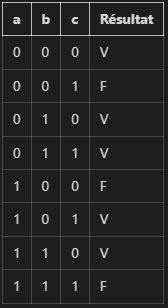

In [23]:
from IPython.display import Image
Image(filename='resultTable.PNG')

We can see all the possible outcomes of the previous equation. Therefore, the response from the quantum circuit should be a superposition of the correct results. (V)


## Oracle creation

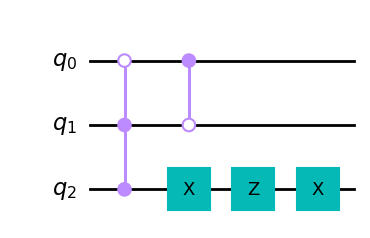

In [24]:
oracle = PhaseOracle(expression=expression)
oracle.draw('mpl')

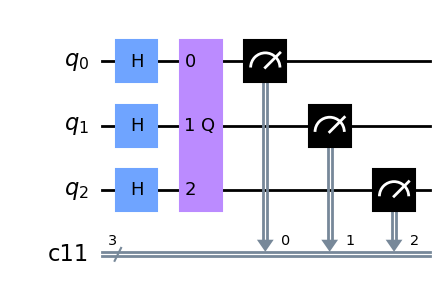

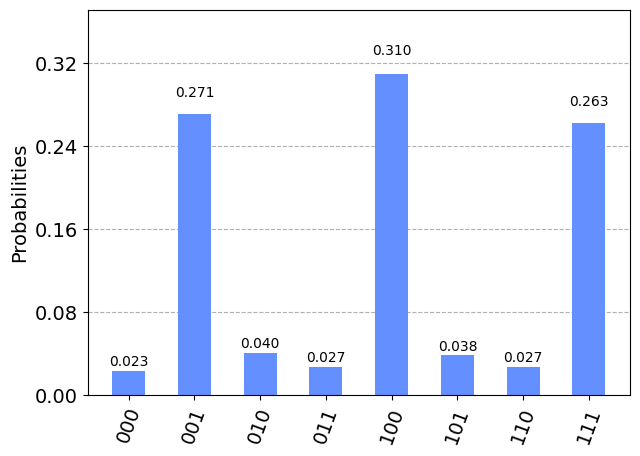

In [25]:
# Backend configuration
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)

# Creation of amplitude amplification.
problem = AmplificationProblem(oracle=oracle)

# Find the result using grover
grover = Grover(quantum_instance=quantum_instance, iterations = 1)
result = grover.amplify(problem)
display(grover.construct_circuit(problem=problem, power=1, measurement=True).draw('mpl'))
plot_histogram(result.circuit_results)

## Changing the Number of Iterations

With the base code, we can see that the amplitudes do not match the answer. To get to the right answer with Grover's algorithm, we need to repeat the oracle a certain number of times. To determine the necessary number of repetitions, qiskit offers a tool to replace the calculations.

Optimal iteration number : 2


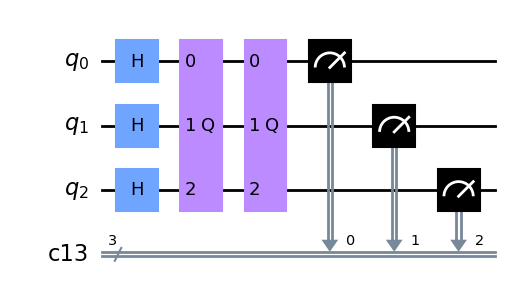

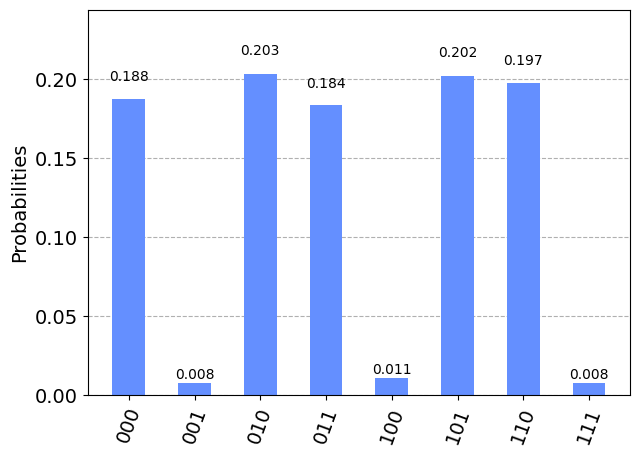

In [26]:
# Find the best number of repetition
nb_iteration = grover.optimal_num_iterations(num_qubits=3, num_solutions=1)
print("Optimal iteration number : " + str(nb_iteration))


# Find the result using grover
second_grover = Grover(quantum_instance=quantum_instance, iterations=nb_iteration)
result = second_grover.amplify(problem)
display(second_grover.construct_circuit(problem=problem, measurement=True).draw('mpl'))
plot_histogram(result.circuit_results)

# Use in a Real-Life Scenario

A real-world example of using an algorithm is coloring a map of countries with different colors. Since the goal of the experiment isn't design and quantum computers aren't the most efficient, the countries on the map will be replaced by nodes.

Imagine a square where each corner represents a letter. We want to color the nodes so that no adjacent nodes have the same color.

The two available colors are R (red) and B (blue).

Each corner is named with a letter: A, B, C, and D. In this context, we have a multitude of possible combinations, most of which are not valid.

### Node creation

In [27]:
class Node():

    list_neighbor = list()
    def __init__(self, name):
        self.name = name
        self.list_neighbor = []
    def add_neighbor(self, neighbor_node):
        self.list_neighbor.append(neighbor_node)

    def create_expression(self,color):
        expression = ""
        for voisin in self.list_neighbor:
            expression += ("( ~" + self.name + color +" | ~" + voisin.name + color + ") & ")

        expression = expression[:-3]
        return expression


### Graph creation

The node class created above can be used to create a graph. Here's a representation of the created graph:



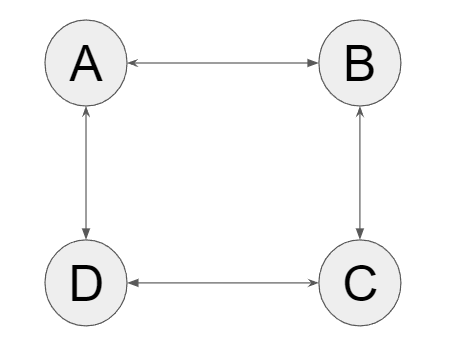

In [28]:
from IPython.display import Image
Image(filename='sat1.PNG')

In [29]:
nodeA = Node("a")
nodeB = Node("b")
nodeC = Node("c")
nodeD = Node("d")

nodeA.add_neighbor(nodeB)
nodeA.add_neighbor(nodeD)

nodeB.add_neighbor(nodeA)
nodeB.add_neighbor(nodeC)

nodeC.add_neighbor(nodeB)
nodeC.add_neighbor(nodeD)

nodeD.add_neighbor(nodeA)
nodeD.add_neighbor(nodeC)

In [30]:
# All nodes must have a color.
liste_expression = []
colors = ["r", "b"]
for node in [nodeA, nodeB, nodeC, nodeD]:
    ligne = "("
    for color in colors:
        ligne += node.name + color + " | "
    ligne = ligne[:-3]
    ligne += ")"
    for color in colors:
        liste_expression.append(node.create_expression(color))
    liste_expression.append(ligne)

joined = " & ".join(liste_expression)

print("Final equation : ")
print(joined)
print()

valeur_filtrer = re.findall(r"[a-z]{2}", joined)

valeur_convertit = []

for i in valeur_filtrer:
    if i not in valeur_convertit:
        valeur_convertit.append(i)

print("Values sorted according to the matching bit: ")
print(valeur_convertit)


Final equation : 
( ~ar | ~br) & ( ~ar | ~dr) & ( ~ab | ~bb) & ( ~ab | ~db) & (ar | ab) & ( ~br | ~ar) & ( ~br | ~cr) & ( ~bb | ~ab) & ( ~bb | ~cb) & (br | bb) & ( ~cr | ~br) & ( ~cr | ~dr) & ( ~cb | ~bb) & ( ~cb | ~db) & (cr | cb) & ( ~dr | ~ar) & ( ~dr | ~cr) & ( ~db | ~ab) & ( ~db | ~cb) & (dr | db)

Values sorted according to the matching bit: 
['ar', 'br', 'dr', 'ab', 'bb', 'db', 'cr', 'cb']


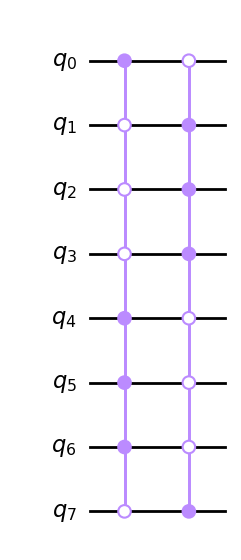

In [31]:
oracle = PhaseOracle(expression=joined)
oracle.draw('mpl')

Optimal iteration number : 8


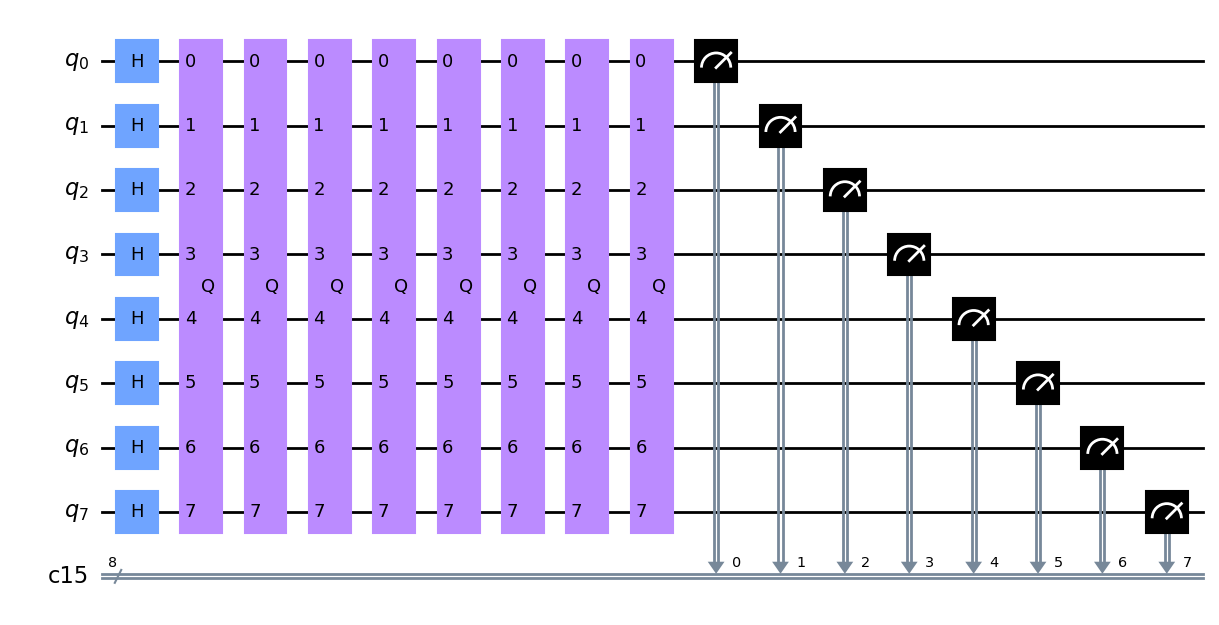

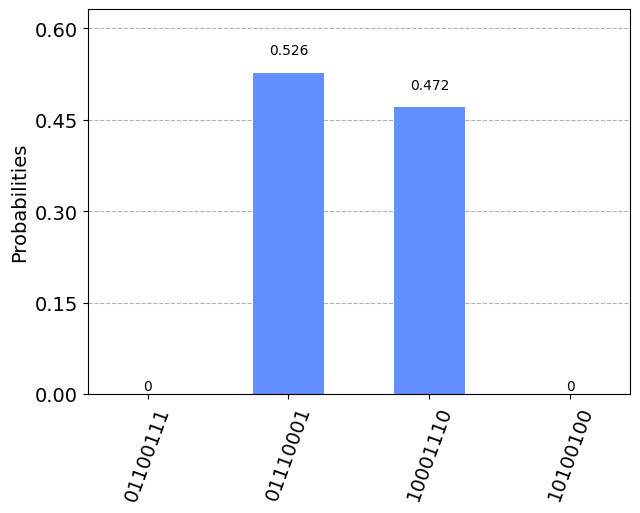

01110001


In [32]:
# Creation of Amplitude Amplification
problem = AmplificationProblem(oracle=oracle)


# Using Grover to find the result
grover = Grover(quantum_instance=quantum_instance, iterations=1)

# Determine the correct number of iterations for the next amplification circuit.
nb_iteration = grover.optimal_num_iterations(num_qubits=7, num_solutions=1)
print("Optimal iteration number : " + str(nb_iteration))

grover = Grover(quantum_instance=quantum_instance, iterations=nb_iteration)

result = grover.amplify(problem)
display(grover.construct_circuit(problem=problem, measurement=True).draw('mpl'))
display(plot_histogram(result.circuit_results))
print(result.top_measurement)

In [33]:
print(result.top_measurement)

01110001


In [34]:
result_string = str(result.top_measurement)

for i in range(0,len(result_string)):
    if result_string[i] == "1":
        print(valeur_convertit[i])


br
dr
ab
cb


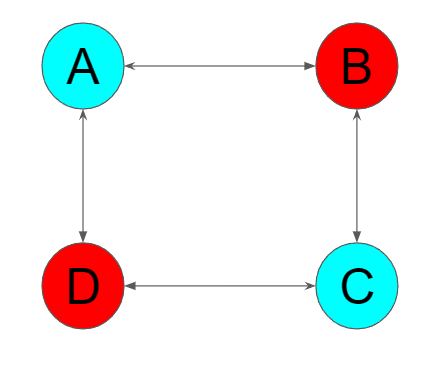

In [35]:
from IPython.display import Image
Image(filename='sat2.PNG')

# Analysis of Results and Conclusion

As demonstrated by the above algorithm, it's possible to solve intriguing problems using the satisfiability principle and Grover's algorithm. This provides a significant advantage over the classical version. In our case, there are two possible solutions to the two-color square graph problem. The algorithm successfully identified the correct values and determined the two possible outcomes (the corners must be of the same color). The created algorithm allows for the generation of different graphs and tests by merely changing the node section. However, the code for generating the quantum circuit and combinations is not optimal. This means that this algorithm cannot operate in the NISQ era since it's too deep.